In [1]:
#abbiamo train df divise dal test df (nel test df non c'è il target). il test ci serve solo per fare previsioni

In [2]:
#dobbiamo dividere train e test DI NUOVO!!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_pickle('diamonds_train.pkl')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.32,Ideal,H,VVS1,62.7,55.0,692,4.37,4.40,2.75
1,1.26,Good,J,SI1,63.9,58.0,4255,6.78,6.74,4.32
2,0.30,Good,J,SI1,64.0,55.0,439,4.28,4.25,2.73
3,0.41,Ideal,E,VS2,62.5,55.0,935,4.74,4.77,2.97
4,0.71,Very Good,E,VS1,63.3,59.0,2946,5.64,5.67,3.58
...,...,...,...,...,...,...,...,...,...,...
43147,0.33,Premium,G,SI1,59.8,58.0,631,4.54,4.52,2.71
43148,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87
43149,0.26,Ideal,E,VVS2,61.5,56.0,769,4.11,4.08,2.52
43150,0.40,Very Good,G,SI1,62.8,60.0,702,4.66,4.70,2.94


In [5]:
#file pkl molto più veloce da leggere!! in più se lo importo non c'è la colonna Unnamed

#TRAIN TEST SPLIT

In [3]:
train_df, test_df = train_test_split(df, shuffle=True, test_size=0.25, random_state=22)

#EDA

#PREPROCESSING

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32364 entries, 37530 to 29484
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    32364 non-null  float64
 1   cut      32364 non-null  object 
 2   color    32364 non-null  object 
 3   clarity  32364 non-null  object 
 4   depth    32364 non-null  float64
 5   table    32364 non-null  float64
 6   price    32364 non-null  int64  
 7   x        32364 non-null  float64
 8   y        32364 non-null  float64
 9   z        32364 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.7+ MB


In [8]:
train_df.describe()

,carat,depth,table,price,x,y,z
count,32364.000000,32364.00000,32364.000000,32364.000000,32364.000000,32364.000000,32364.000000
mean,0.799852,61.75250,57.458148,3941.415925,5.735155,5.737073,3.540692
std,0.475173,1.43494,2.218526,3987.959617,1.123716,1.115085,0.695932
min,0.200000,43.00000,44.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.00000,56.000000,954.000000,4.720000,4.720000,2.910000
50%,0.700000,61.80000,57.000000,2423.500000,5.700000,5.720000,3.530000
75%,1.040000,62.50000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.00000,79.000000,18823.000000,10.740000,10.540000,6.980000


##DEFINIZIONE DELLE FEATURES E TARGET

In [ ]:
#dimentichiamoci per il momento dei test set

In [4]:
features = ['carat','depth','table','x','y','z']

In [5]:
X_train = train_df[features].copy()
y_train = train_df['price'].copy()

##STANDARDIZATION

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
X_train_scaled = scaler.fit_transform(X_train)

In [13]:
#passaggio fondamentale per trasformare l'array delle feature scalate in dataframe e poi concatenarlo
#X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)

##ENCODING CATEGORICHE

In [15]:
df['cut'].value_counts()

Ideal        17097
Premium      11088
Very Good     9736
Good          3928
Fair          1303
Name: cut, dtype: int64

In [16]:
df['color'].value_counts()

G    9014
E    7859
F    7609
H    6653
D    5392
I    4371
J    2254
Name: color, dtype: int64

In [17]:
df['clarity'].value_counts()

SI1     10485
VS2      9808
SI2      7385
VS1      6518
VVS2     4040
VVS1     2876
IF       1426
I1        614
Name: clarity, dtype: int64

In [9]:
categorical_features = [col for col in df.columns if df[col].dtype==object]

dummies = pd.get_dummies(train_df[categorical_features], drop_first=True)
#drop_first=True significa che non converte la prima colonna in numerica

X_train = X_train.drop(categorical_features, axis=1)
X_train = X_train.join(dummies)

KeyError: ignored

In [20]:
#X_train = pd.concat([X_train_scaled,train_dummies], axis=1, ignore_index=False)
#X_test = pd.concat([X_test_scaled,test_dummies], axis=1, ignore_index=False)

In [21]:
X_train

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
37530,1.052578,0.730007,-0.657270,1.152306,1.069825,1.206038,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
37803,-0.967772,-1.709157,1.145757,-1.027993,-1.091479,-1.208027,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
32402,-1.009863,-0.872872,0.244243,-1.170380,-1.136319,-1.222396,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6140,2.925610,-0.036587,0.244243,2.353696,2.280514,2.298115,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
6638,-0.988817,-2.684823,1.145757,-1.054691,-1.046638,-1.294243,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20971,1.599756,-2.475752,0.695000,1.704056,1.760366,1.335363,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
23030,0.400173,-0.733491,3.850296,0.609456,0.540709,0.473197,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
24932,-0.210141,4.075148,-1.558783,-0.155873,-0.293321,0.243286,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
31680,-1.115089,-0.245659,-0.206513,-1.392860,-1.378457,-1.394829,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


#FITTING

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


## KNN

In [10]:
### FITTING
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV


In [ ]:
params = {'n_estimators':range(2,20), 
    'max_depth':np.arange(1,10),
    'max_features':['auto', 'sqrt', 'log2']
    }


model = RandomizedSearchCV(RandomForestRegressor(), param_distributions=parameters, cv=KFold(n_splits=10), scoring='r2')

In [23]:
#bisogna scegliere quanti k

##HYPERPARAMETERS TUNING

In [24]:
#ciclo delle k

FUNZIONE EVALUATE

In [26]:
#funzione di evaluation

def evaluate(targets, preds, title, plots=True, verbose=True):

    from sklearn.metrics import mean_absolute_error, r2_score
    
    mae = mean_absolute_error(targets, preds)
    r2 = r2_score(targets, preds)
    
    if verbose:                 
        print(title)
        print('MAE: ', mae)
        print('R2: ', r2)
    
    if plots:
        ###### previsioni VS targets
        sns.scatterplot(x=targets, y=preds)
        ###### retta di perfect fit
        plt.plot(np.arange(0,targets.max()), np.arange(0,targets.max()), label='perfect fit')
        plt.title(title)
        plt.legend()
        plt.show()
    
    return {'mae':mae, 'r2':r2}

In [28]:
### Provare a trovare un buon valore di n_neighbors

train_r2_list = list()
test_r2_list = list()

k_list = range(1, 20)

for k in k_list:
    
    print('\nK:',k)
    
    model = KNeighborsRegressor(n_neighbors = k)
    model = model.fit(X_train, y_train)
    
    ### EVALUATION
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET', plots=False, verbose=True)
    test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET', plots=False, verbose=True)
    over = train_metrics['r2'] - test_metrics['r2']
    print('La differenza è:', over)
     
    train_r2_list += [train_metrics['r2']]
    test_r2_list += [test_metrics['r2']]
    


K: 1
TRAIN SET
MAE:  0.3164627363737486
R2:  0.9999953423557809
TEST SET
MAE:  487.41611049314054
R2:  0.9326781173610786
La differenza è: 0.06731722499470227

K: 2
TRAIN SET
MAE:  242.04188295637127
R2:  0.9847748697413159
TEST SET
MAE:  454.1987393400074
R2:  0.9458810023848399
La differenza è: 0.03889386735647604

K: 3
TRAIN SET
MAE:  300.4736435545668
R2:  0.9779931383882758
TEST SET
MAE:  439.70680385613645
R2:  0.9505606008972628
La differenza è: 0.027432537491013043

K: 4
TRAIN SET
MAE:  330.54063929056974
R2:  0.9735015460547048
TEST SET
MAE:  435.1154060066741
R2:  0.952111160323626
La differenza è: 0.021390385731078876

K: 5
TRAIN SET
MAE:  353.0256704980843
R2:  0.9699924871410532
TEST SET
MAE:  435.1826288468669
R2:  0.9519762857231764
La differenza è: 0.018016201417876854

K: 6
TRAIN SET
MAE:  366.76980595723643
R2:  0.967627534619323
TEST SET
MAE:  437.0539179335063
R2:  0.9507864708243347
La differenza è: 0.016841063794988398

K: 7
TRAIN SET
MAE:  378.98542030827906
R2:

K = 4

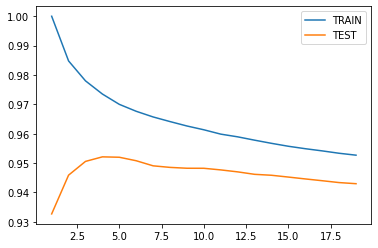

In [29]:
plt.plot(k_list, train_r2_list, label='TRAIN')
plt.plot(k_list, test_r2_list, label='TEST')
plt.legend()
plt.show()

FITTING SULLA K MIGLIORE = 4

In [30]:
model = KNeighborsRegressor(n_neighbors=4)
model = model.fit(X_train, y_train)

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict

results = cross_validate(model, X_train, y_train, cv=KFold(n_splits=20), scoring=['r2'], return_train_score=True)

EVALUATION

In [33]:
X_test = test_df[features].copy()
y_test = test_df['price'].copy()